# Import section

In [1]:
import re
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import webbrowser
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Web scraping.

 Web scraping of Madrid homes from the Idealista website (03/08/2025)

In [33]:
pages = [1,2,3,4,5,6,7,8,9,10]
#Headers for the request
headers = {
          'accept' : 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
          'Accept-encoding' : 'gzip, deflate, br, zstd',
          'Accept-language' : 'es-ES,es;q=0.9',
          'Referer' :	'http://www.google.com/',
          'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36 OPR/113.0.0.0'
     }
#Variables
Name = list()
Price = list()
Space = list()
Hab = list()
Garage = list()
Link = list()
Sale = list()
#WEb scraping
for pag in pages:
    web = f'https://www.idealista.com/venta-viviendas/madrid-madrid/pagina-{pag}.htm'
    contenido = requests.get(web,headers=headers)
    content = contenido.text
    soup = bs(content,'html.parser')
    Floors = soup.find_all('article' )

    for floor in Floors:
        try:
           Name.append(floor.find('a',class_='item-link').get('title'))
           Link.append(floor.find('a',class_='item-link').get('href'))
           Price.append(floor.find('span',class_='item-price h2-simulated').get_text())
           try:
                Sale.append(floor.find('span',class_ = 'pricedown_icon icon-pricedown').get_text())
           except:
                Sale.append('0%')
           try:
                Garage.append(floor.find('span',class_='item-parking').get_text())
           except:
                Garage.append('Garaje no incluido')

           Hab.append(floor.find_all('span',class_ = 'item-detail')[0].get_text())
           Space.append(floor.find_all('span',class_ = 'item-detail')[1].get_text())
        except:
            continue
    dicc = {
        'Nombre': Name,
        'Enlace':Link,
        'Precio':Price,
        'Rebaja':Sale,
        'Numero de habitaciones':Hab,
        'Espacio':Space,
        'Garaje':Garage,

    }
    df =pd.DataFrame(dicc)
    # Save the DataFrame to a CSV file
    df.to_csv('df_pisos_Madrid.csv',index = False)






# Removing duplicates values

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.head()

,Nombre,Enlace,Precio,Rebaja,Numero de habitaciones,Espacio,Garaje
0,"Ático en Calle de las Aguas, Palacio, Madrid",/inmueble/108324155/,850.000€,5%,2 hab.,106 m²,Garaje no incluido
1,"Piso en Calle de Esparteros, Sol, Madrid",/inmueble/108361180/,760.000€,5%,5 hab.,140 m²,Garaje no incluido
2,"Piso en Calle de las Aguas, Palacio, Madrid",/inmueble/108538807/,850.000€,5%,2 hab.,106 m²,Garaje no incluido
3,"Piso en Calle del Carril de los Caleros, Arava...",/inmueble/106702840/,1.335.000€,0%,3 hab.,157 m²,Garaje incluido
4,"Piso en Calle de Noblejas, Palacio, Madrid",/inmueble/105036254/,1.495.000€,0%,3 hab.,164 m²,Garaje no incluido


In [36]:
# Transformaciones
df['Precio'] = df['Precio'].astype(str).str.replace('€', '', regex=False).str.replace('.', '', regex=False).astype(int)
df['Rebaja'] = df['Rebaja'].astype(str).str.replace('%', '', regex=False).astype(int)
df['Numero de habitaciones'] = df['Numero de habitaciones'].astype(str).str.extract('(\d+)').astype(int)
df['Espacio'] = df['Espacio'].astype(str).str.extract('(\d+)').astype(int)
df['Garaje'] = df['Garaje'].apply(lambda x: 1 if 'incluido' in x.lower() and 'no' not in x.lower() else 0)
df['Garaje'] = df['Garaje'].astype(int)
# Guardar el DataFrame modificado completo
df.to_csv('df_pisos_Madrid_clean.csv', index=False)

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\alvar\AppData\Local\Temp\ipykernel_21308\1319580380.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['Numero de habitaciones'] = df['Numero de habitaciones'].astype(str).str.extract('(\d+)').astype(int)
C:\Users\alvar\AppData\Local\Temp\ipykernel_21308\1319580380.py:5: SyntaxWarning: invalid escape sequence '\d'
  df['Espacio'] = df['Espacio'].astype(str).str.extract('(\d+)').astype(int)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Nombre                  296 non-null    object
 1   Enlace                  296 non-null    object
 2   Precio                  296 non-null    int32 
 3   Rebaja                  296 non-null    int32 
 4   Numero de habitaciones  296 non-null    int32 
 5   Espacio                 296 non-null    int32 
 6   Garaje                  296 non-null    int32 
dtypes: int32(5), object(2)
memory usage: 12.7+ KB


In [38]:
df.head()

,Nombre,Enlace,Precio,Rebaja,Numero de habitaciones,Espacio,Garaje
0,"Ático en Calle de las Aguas, Palacio, Madrid",/inmueble/108324155/,850000,5,2,106,0
1,"Piso en Calle de Esparteros, Sol, Madrid",/inmueble/108361180/,760000,5,5,140,0
2,"Piso en Calle de las Aguas, Palacio, Madrid",/inmueble/108538807/,850000,5,2,106,0
3,"Piso en Calle del Carril de los Caleros, Arava...",/inmueble/106702840/,1335000,0,3,157,1
4,"Piso en Calle de Noblejas, Palacio, Madrid",/inmueble/105036254/,1495000,0,3,164,0


In [39]:
df.describe()

,Precio,Rebaja,Numero de habitaciones,Espacio,Garaje
count,2.960000e+02,296.000000,296.000000,296.000000,296.000000
mean,2.250869e+06,0.648649,3.513514,223.030405,0.412162
std,1.967161e+06,1.844331,1.623917,164.292347,0.493058
min,2.985000e+05,0.000000,1.000000,1.000000,0.000000
25%,9.575000e+05,0.000000,2.000000,115.000000,0.000000
50%,1.594500e+06,0.000000,3.000000,164.000000,0.000000
75%,2.557500e+06,0.000000,4.000000,297.250000,1.000000
max,1.500000e+07,10.000000,11.000000,969.000000,1.000000


# Checking NaN values

In [40]:
df.isna().sum()


Nombre                    0
Enlace                    0
Precio                    0
Rebaja                    0
Numero de habitaciones    0
Espacio                   0
Garaje                    0
dtype: int64

# Remove outliers

Text(0.5, 1.0, 'Price Outliers')

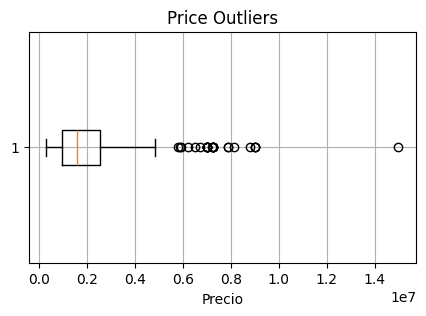

In [46]:
fig, axs = plt.subplots(figsize=(5, 3))
axs.grid('both')
axs.boxplot(df['Precio'],vert = False)
axs.set_xlabel('Precio')
axs.set_title('Price Outliers')

In [48]:
q1 = df['Precio'].quantile(0.25)
q3 = df['Precio'].quantile(0.75)
iqr = q3 - q1

lower_bound = (q1 - 1.5*iqr).round(2)
upper_bound = (q3 + 1.5*iqr).round(2)
df['Precio'] = df['Precio'].clip(lower=lower_bound, upper=upper_bound)


In [49]:
df.describe()

,Precio,Rebaja,Numero de habitaciones,Espacio,Garaje
count,2.960000e+02,296.000000,296.000000,296.000000,296.000000
mean,2.027769e+06,0.648649,3.513514,223.030405,0.412162
std,1.323363e+06,1.844331,1.623917,164.292347,0.493058
min,2.985000e+05,0.000000,1.000000,1.000000,0.000000
25%,9.575000e+05,0.000000,2.000000,115.000000,0.000000
50%,1.594500e+06,0.000000,3.000000,164.000000,0.000000
75%,2.557500e+06,0.000000,4.000000,297.250000,1.000000
max,4.957500e+06,10.000000,11.000000,969.000000,1.000000


# Save to .csv

In [50]:
df.to_csv('Data_clean.csv')